Importamos las librerías que nos harán falta en el desarrollo del ejercicio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
malware = pd.read_csv('/content/malware_dataset.csv')
malware

transact  onServiceConnected  bindService  attachInterface  \
0             0                   0            0                0   
1             0                   0            0                0   
2             0                   0            0                0   
3             0                   0            0                0   
4             0                   0            0                0   
...         ...                 ...          ...              ...   
15031         1                   1            1                1   
15032         0                   0            0                0   
15033         0                   0            0                0   
15034         1                   1            1                1   
15035         1                   1            1                1   

       ServiceConnection  android.os.Binder  SEND_SMS  \
0                      0                  0         1   
1                      0                  0         1   
2                      0                  0         1   
3                      0                  0         0   
4                      0                  0         0   
...                  ...                ...       ...   
15031                  1                  1         0   
15032                  0                  0         0   
15033                  0                  0         0   
15034                  1                  1         0   
15035                  1                  1         0   

       Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                      0                            0   
1                                      0                            0   
2                                      0                            0   
3                                      0                            0   
4                                      0                            0   
...                                  ...                          ...   
15031                                  1                            1   
15032                                  0                            0   
15033                                  0                            0   
15034                                  1                            1   
15035                                  1                            1   

       Ljava.lang.Class.cast  ...  READ_CONTACTS  DEVICE_POWER  HARDWARE_TEST  \
0                          0  ...              0             0              0   
1                          0  ...              0             0              0   
2                          0  ...              0             0              0   
3                          1  ...              0             0              0   
4                          0  ...              0             0              0   
...                      ...  ...            ...           ...            ...   
15031                      1  ...              0             0              0   
15032                      1  ...              0             0              0   
15033                      0  ...              0             0              0   
15034                      1  ...              1             0              0   
15035                      1  ...              0             0              0   

       ACCESS_WIFI_STATE  WRITE_EXTERNAL_STORAGE  ACCESS_FINE_LOCATION  \
0                      0                       1                     0   
1                      0                       1                     0   
2                      0                       0                     0   
3                      1                       1                     1   
4                      1                       0                     1   
...                  ...                     ...                   ...   
15031                  1                       1                     0   
15032                  1                       1   

#**Tarea 1a:** Realiza una descripción del dataset. Indica qué son las características que describen cada ejemplo y utiliza las herramientas que consideres necesarias para evaluar las características y su aporte a una tarea de clasificación.

Se trata de un dataset con muchas columnas, por lo que explicar que es cada característica puede llegar a ser imposible, sin embargo, hay muchas características como "class" que nos indica si una aplicación es benigna o maligna, algo que aporta bastante información.

Para la evaluación de estas características y por tanto, su aporte, en primer lugar observaremos que esté todo correcto y tratamos de buscar si hay algo inusual como un dato que se repita en especial o alguna característica que esté en blanco.

In [ ]:
malware.info()  #obtenemos información general en cuanto el tamaño del dataset, tanto el número de datos como lo que usa de memoria este.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


In [ ]:
malware.describe()  #utilizamos este método ya que 214 de 216 características son numéricas (1 o 0) y por tanto los métodos matemáticos que se usan nos serán de gran ayuda para entender más a fondo el dataset.

transact  onServiceConnected   bindService  attachInterface  \
count  15036.000000        15036.000000  15036.000000     15036.000000   
mean       0.426443            0.446595      0.442671         0.413208   
std        0.494576            0.497156      0.496719         0.492426   
min        0.000000            0.000000      0.000000         0.000000   
25%        0.000000            0.000000      0.000000         0.000000   
50%        0.000000            0.000000      0.000000         0.000000   
75%        1.000000            1.000000      1.000000         1.000000   
max        1.000000            1.000000      1.000000         1.000000   

       ServiceConnection  android.os.Binder      SEND_SMS  \
count       15036.000000       15036.000000  15036.000000   
mean            0.444932           0.486898      0.236632   
std             0.496975           0.499845      0.425029   
min             0.000000           0.000000      0.000000   
25%             0.000000           0.000000      0.000000   
50%             0.000000           0.000000      0.000000   
75%             1.000000           1.000000      0.000000   
max             1.000000           1.000000      1.000000   

       Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
count                       15036.000000                 15036.000000   
mean                            0.330806                     0.282389   
std                             0.470519                     0.450177   
min                             0.000000                     0.000000   
25%                             0.000000                     0.000000   
50%                             0.000000                     0.000000   
75%                             1.000000                     1.000000   
max                             1.000000                     1.000000   

       Ljava.lang.Class.cast  ...  SET_ORIENTATION  READ_CONTACTS  \
count           15036.000000  ...     15036.000000   15036.000000   
mean                0.312583  ...         0.007050       0.233307   
std                 0.463561  ...         0.083669       0.422950   
min                 0.000000  ...         0.000000       0.000000   
25%                 0.000000  ...         0.000000       0.000000   
50%                 0.000000  ...         0.000000       0.000000   
75%                 1.000000  ...         0.000000       0.000000   
max                 1.000000  ...         1.000000       1.000000   

       DEVICE_POWER  HARDWARE_TEST  ACCESS_WIFI_STATE  WRITE_EXTERNAL_STORAGE  \
count  15036.000000   15036.000000       15036.000000            15036.000000   
mean       0.017425       0.004256           0.434424                0.666135   
std        0.130852       0.065105           0.495698                0.471608   
min        0.000000       0.000000           0.000000                0.000000   
25%        0.000000       0.000000           0.000000                0.000000   
50%        0.000000       0.000000           0.000000                1.000000   
75%        0.000000       0.000000           1.000000                1.000000   
max        1.000000       1.000000           1.000000                1.000000   

       ACCESS_FINE_LOCATION  SET_WALLPAPER_HINTS  SET_PREFERRED_APPLICATIONS  \
count          15036.000000         15036.000000                15036.000000   
mean               0.290835             0.016028                    0.007050   
std                0.454163             0.125588                    0.083669   
min                0.000000             0.000000                    0.000000   
25%                0.000000             0.000000                    0.000000   
50%                0.000000             0.000000                    0.000000   
75%                1.000000             0.000000                    0.000000   
max                1.000000             1.000000                    1.000000   

       WRITE_SECURE_SETTINGS  
count           15036.000000  
m

In [ ]:
malware.columns.is_unique   #nos cercioramos de que ninguna columna esté repetida

True

In [ ]:
malware.dtypes               #nos damos cuenta que al ser todo 1s y 0s el tipo de dato es el mismo

transact                       int64
onServiceConnected             int64
bindService                    int64
attachInterface                int64
ServiceConnection              int64
                               ...  
ACCESS_FINE_LOCATION           int64
SET_WALLPAPER_HINTS            int64
SET_PREFERRED_APPLICATIONS     int64
WRITE_SECURE_SETTINGS          int64
class                         object
Length: 216, dtype: object

In [ ]:
malware.dtypes.value_counts()

int64     214
object      2
dtype: int64

In [ ]:
malware.describe(include = 'object')

TelephonyManager.getSimCountryIso  class
count                              15036  15036
unique                                 5      2
top                                    0      B
freq                                6994   9476

tras estas ejecuciones nos damos cuenta que predominan las aplicaciones beningnas, sin embargo, el dataset está lleno de 0s, lo que significa que se complicará un poco el estudio que realizaremos, puesto que lo que nos interesa son los 1s.

#**Tarea 1b:** Realiza las tareas de pre-procesamiento necesarias para poder entrenar algoritmos de clasificación sobre este dataset. Evalúa la posibilidad de obtener subconjuntos de las características que sean relevantes y suficientes para la clasificación.

##Preprocesamiento de datos

Investiguemos la columna TelephonyManager.getSimCountryIso, pues tiene 5 valores y deberian ser 2 (un 1 o un 0)

In [ ]:
malware['TelephonyManager.getSimCountryIso'].unique()

array(['0', '1', '?', 1, 0], dtype=object)

observamos que muchos 1s y 0s están en formato string en vez de numérico, además hay en una serie de filas que hay una interrogación en vez de un valor, algo que no aporta nada y con lo que no se puede trabajar cómodamente.

In [ ]:
malware[malware['TelephonyManager.getSimCountryIso'] == '?']

transact  onServiceConnected  bindService  attachInterface  \
176          0                   0            0                0   
1971         0                   0            0                0   
2109         0                   0            0                0   
2950         0                   0            0                0   
5174         0                   0            0                0   

      ServiceConnection  android.os.Binder  SEND_SMS  \
176                   0                  0         0   
1971                  0                  0         0   
2109                  0                  0         0   
2950                  0                  0         0   
5174                  0                  0         0   

      Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
176                                   0                            0   
1971                                  0                            0   
2109                                  0                            0   
2950                                  0                            0   
5174                                  0                            0   

      Ljava.lang.Class.cast  ...  READ_CONTACTS  DEVICE_POWER  HARDWARE_TEST  \
176                       0  ...              0             0              0   
1971                      0  ...              0             0              0   
2109                      0  ...              0             0              0   
2950                      0  ...              0             0              0   
5174                      0  ...              0             0              0   

      ACCESS_WIFI_STATE  WRITE_EXTERNAL_STORAGE  ACCESS_FINE_LOCATION  \
176                   0                       0                     0   
1971                  0                       0                     0   
2109                  0                       0                     0   
2950                  0                       0                     0   
5174                  0                       0                     0   

      SET_WALLPAPER_HINTS  SET_PREFERRED_APPLICATIONS  WRITE_SECURE_SETTINGS  \
176                     0                           0                      0   
1971                    0                           0                      0   
2109                    0                           0                      0   
2950                    0                           0                      0   
5174                    0                           0                      0   

      class  
176       S  
1971      S  
2109      S  
2950      S  
5174      S  

[5 rows x 216 columns]

Vamos a eliminar las filas que contengan interrogaciones, ya que solo son 5 filas las que contienen este valor y no aporta nada.

In [ ]:
drop_rows =  malware[malware['TelephonyManager.getSimCountryIso'] == '?']
malware.drop(drop_rows.index, axis=0, inplace=True)

In [ ]:
malware[malware['TelephonyManager.getSimCountryIso'] == '?']

Empty DataFrame
Columns: [transact, onServiceConnected, bindService, attachInterface, ServiceConnection, android.os.Binder, SEND_SMS, Ljava.lang.Class.getCanonicalName, Ljava.lang.Class.getMethods, Ljava.lang.Class.cast, Ljava.net.URLDecoder, android.content.pm.Signature, android.telephony.SmsManager, READ_PHONE_STATE, getBinder, ClassLoader, Landroid.content.Context.registerReceiver, Ljava.lang.Class.getField, Landroid.content.Context.unregisterReceiver, GET_ACCOUNTS, RECEIVE_SMS, Ljava.lang.Class.getDeclaredField, READ_SMS, getCallingUid, Ljavax.crypto.spec.SecretKeySpec, android.intent.action.BOOT_COMPLETED, USE_CREDENTIALS, MANAGE_ACCOUNTS, android.content.pm.PackageInfo, KeySpec, TelephonyManager.getLine1Number, DexClassLoader, HttpGet.init, SecretKey, Ljava.lang.Class.getMethod, System.loadLibrary, android.intent.action.SEND, Ljavax.crypto.Cipher, WRITE_SMS, READ_SYNC_SETTINGS, AUTHENTICATE_ACCOUNTS, android.telephony.gsm.SmsManager, WRITE_HISTORY_BOOKMARKS, TelephonyManager.getSubscriberId, mount, INSTALL_PACKAGES, Runtime.getRuntime, CAMERA, Ljava.lang.Object.getClass, WRITE_SYNC_SETTINGS, READ_HISTORY_BOOKMARKS, Ljava.lang.Class.forName, INTERNET, android.intent.action.PACKAGE_REPLACED, Binder, android.intent.action.SEND_MULTIPLE, RECORD_AUDIO, IBinder, android.os.IBinder, createSubprocess, NFC, ACCESS_LOCATION_EXTRA_COMMANDS, URLClassLoader, WRITE_APN_SETTINGS, abortBroadcast, BIND_REMOTEVIEWS, android.intent.action.TIME_SET, READ_PROFILE, TelephonyManager.getDeviceId, MODIFY_AUDIO_SETTINGS, getCallingPid, READ_SYNC_STATS, BROADCAST_STICKY, android.intent.action.PACKAGE_REMOVED, android.intent.action.TIMEZONE_CHANGED, WAKE_LOCK, RECEIVE_BOOT_COMPLETED, RESTART_PACKAGES, Ljava.lang.Class.getPackage, chmod, Ljava.lang.Class.getDeclaredClasses, android.intent.action.ACTION_POWER_DISCONNECTED, android.intent.action.PACKAGE_ADDED, PathClassLoader, TelephonyManager.getSimSerialNumber, Runtime.load, TelephonyManager.getCallState, BLUETOOTH, READ_CALENDAR, READ_CALL_LOG, SUBSCRIBED_FEEDS_WRITE, READ_EXTERNAL_STORAGE, TelephonyManager.getSimCountryIso, sendMultipartTextMessage, PackageInstaller, VIBRATE, remount, android.intent.action.ACTION_SHUTDOWN, sendDataMessage, ACCESS_NETWORK_STATE, ...]
Index: []

[0 rows x 216 columns]

Ahora vamos a convertir a numérico los string '0' y '1' para poder trabajar de manera más cómoda con ellos.


In [ ]:
malware['TelephonyManager.getSimCountryIso'] = malware['TelephonyManager.getSimCountryIso'].astype('int64')

In [ ]:
malware.dtypes.value_counts()

int64     215
object      1
dtype: int64

In [ ]:
malware.select_dtypes('object')

class
0         S
1         S
2         S
3         S
4         S
...     ...
15031     B
15032     B
15033     B
15034     B
15035     B

[15031 rows x 1 columns]

Además, como tarea de preprocesamiento, nos interesa saber si en el dataset hay valores nulos y en qué proporción se encuentran en el caso de que haya, para así eliminarlos, sustituirlos....

In [ ]:
malware.isnull().sum()

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64

In [ ]:
all(malware.isna().sum(axis=1)) == 0

True

No hay valores nulos, está todo completo, por lo que de esta manera damos por finalizado el preprocesamiento o "limpieza" del dataset en busca de irregularidades.

Como está todo bien, vamos a tratar de obtener las mejores características para así entrenar los modelo usando distintos métodos vistos en clase.

##Método de las correlaciones

En primer lugar, queremos conocer el porcentaje de unos y ceros para descartar algunas columnas, ya que son muchas y seguro que algunas no aportan mucha información.

In [ ]:
X_corr_methode = malware.drop('class', axis=1)
y = malware['class']

In [ ]:
y.value_counts()

B    9476
S    5555
Name: class, dtype: int64

Para saber si una aplicación es benigna o maliciosa, el nº de B y S es bastante aproximado, no hay una gran disparidad.

In [ ]:
X_corr_methode.columns[X_corr_methode.mean() > 0.9]

Index([], dtype='object')

In [ ]:
len(X_corr_methode.columns[X_corr_methode.mean() < 0.2])

158

observamos como hay 47 columnas que como mucho tienen un 1% de unos y por tanto, dan poca información, así que las eliminaremos.

In [ ]:
cols_to_drop = X_corr_methode.columns[X_corr_methode.mean() < 0.2]
X_corr_methode.drop(cols_to_drop, inplace = True, axis = 1)

In [ ]:
sb = {'S' : 1, 'B': 0}

In [ ]:
y.replace(sb, inplace = True)      #sustituimos las S y B por 1 y 0 respectivamente, ya que a la hora de trabajar con ello resultará más sencillo

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
15031    0
15032    0
15033    0
15034    0
15035    0
Name: class, Length: 15031, dtype: int64

In [ ]:
corr = pd.DataFrame(X_corr_methode)
corr['class'] = y

Queremos observar que columnas poseen una gran correlación entre sí; puede que haya alguna que resulte redundante.

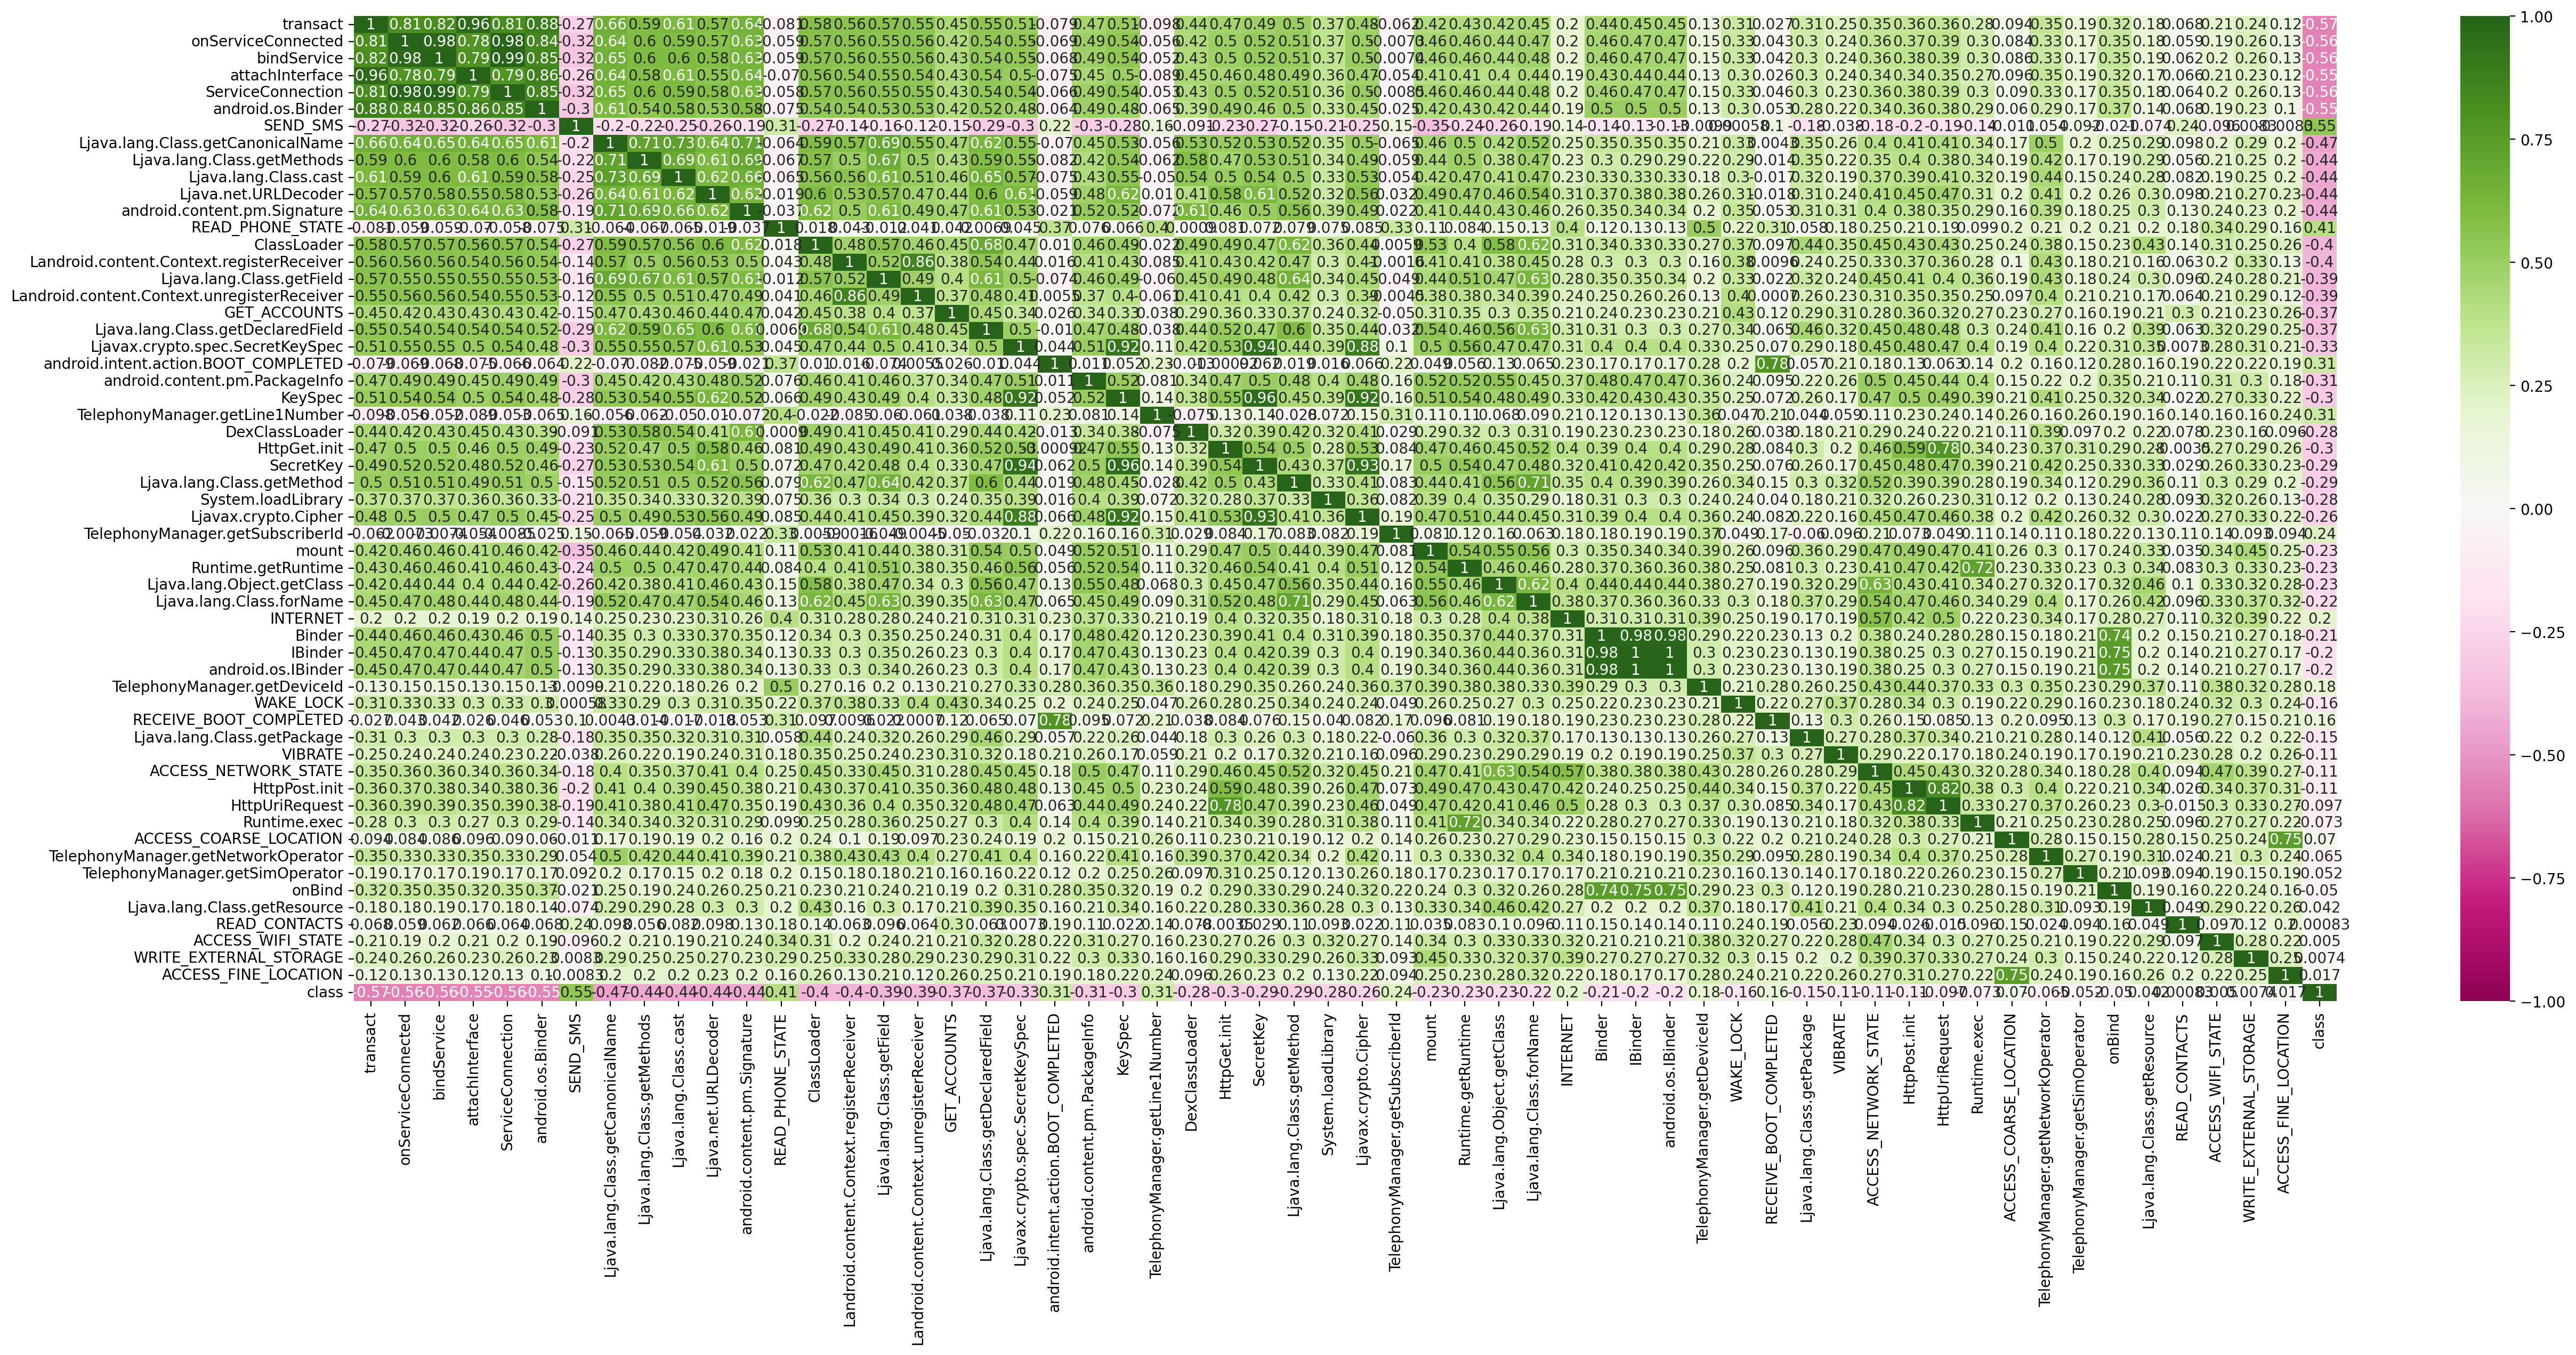

In [ ]:
plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(corr.corr(), annot = True, vmin = -1, vmax = 1, cmap = "PiYG")
plt.show()

Ahora eliminemos las características que tienen mucha correlacion entre sí (una de ellas).

In [ ]:
corrs = corr.corr()
corr_to_drop = []
for i in range(corrs.shape[0]):
  for j in range(i, corrs.shape[1]):
    if i != j and corrs.iloc[i,j] > 0.9:
      corr_to_drop.append([corrs.index[i], corrs.columns[j]])
corr_to_drop = np.array(corr_to_drop)
corr_to_drop = list(set(corr_to_drop[:,0]))
X_corr_methode.drop(corr_to_drop, axis=1, inplace=True)

Y ahora eliminemos las que tengan muy poca correlacion con la clase.

In [ ]:
corr_to_drop = []
for i in range(corrs.shape[1]):
  if corrs.iloc[-1,i] > -0.2 and corrs.iloc[-1,i] < 0.2:
      corr_to_drop.append(corrs.columns[i])
X_corr_methode.drop(corr_to_drop, axis=1, inplace=True)
X_corr_methode.drop('class', axis=1, inplace=True)

In [ ]:
len(X_corr_methode.columns)

31

In [ ]:
X_corr_methode.columns

Index(['attachInterface', 'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast', 'Ljava.net.URLDecoder',
       'android.content.pm.Signature', 'READ_PHONE_STATE', 'ClassLoader',
       'Landroid.content.Context.registerReceiver',
       'Ljava.lang.Class.getField',
       'Landroid.content.Context.unregisterReceiver', 'GET_ACCOUNTS',
       'Ljava.lang.Class.getDeclaredField',
       'android.intent.action.BOOT_COMPLETED',
       'android.content.pm.PackageInfo', 'TelephonyManager.getLine1Number',
       'DexClassLoader', 'HttpGet.init', 'Ljava.lang.Class.getMethod',
       'System.loadLibrary', 'Ljavax.crypto.Cipher',
       'TelephonyManager.getSubscriberId', 'mount', 'Runtime.getRuntime',
       'Ljava.lang.Object.getClass', 'Ljava.lang.Class.forName', 'INTERNET',
       'android.os.IBinder'],
      dtype='object')

Al finalizar este método, hemos obtenido que las columnas/características más relevantes del dataset de 214 finalmente son únicamente 32, que son las que se encuentran justo encima.

##Método de Umbral de la Varianza

Como no queremos fiarnos únicamente de un método, usaremos más para así cerciorarnos de qué conjuntos de características es el mejor.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X_variance_methode = malware.drop('class', axis=1)
sel = VarianceThreshold(threshold=(.7 * (1 - .7)))
X_variance_methode = sel.fit_transform(X_variance_methode)
X_variance_methode.shape[1]

40

In [ ]:
sel.get_feature_names_out()

array(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.cast',
       'Ljava.net.URLDecoder', 'android.content.pm.Signature',
       'READ_PHONE_STATE', 'ClassLoader',
       'Landroid.content.Context.registerReceiver',
       'Ljava.lang.Class.getField',
       'Landroid.content.Context.unregisterReceiver',
       'Ljava.lang.Class.getDeclaredField',
       'Ljavax.crypto.spec.SecretKeySpec',
       'android.intent.action.BOOT_COMPLETED',
       'android.content.pm.PackageInfo', 'KeySpec', 'HttpGet.init',
       'SecretKey', 'Ljava.lang.Class.getMethod', 'System.loadLibrary',
       'Ljavax.crypto.Cipher', 'mount', 'Runtime.getRuntime',
       'Ljava.lang.Class.forName', 'TelephonyManager.getDeviceId',
       'WAKE_LOCK', 'RECEIVE_BOOT_COMPLETED', 'VIBRATE', 'HttpPost.init',
       'HttpUriRequest', 'Runtime.exec',
       'TelephonyManager.getNetworkOperato

##Método KBests

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_KBests_methode = malware.drop('class', axis=1)


# Si con las correlaciones consiguió 31, intentemoslo aquí también
selector = SelectKBest(chi2, k=31)
X_KBests = selector.fit_transform(X_KBests_methode, y)
X_KBests.shape[1]

31

In [ ]:
selected_indices = selector.get_support(indices=True)

selected_feature_names = X_KBests_methode.columns[selected_indices]

# Crear un nuevo DataFrame con las características seleccionadas
X_KBests_methode = X_KBests_methode[selected_feature_names]
X_KBests_methode.columns

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast', 'Ljava.net.URLDecoder',
       'android.content.pm.Signature', 'android.telephony.SmsManager',
       'READ_PHONE_STATE', 'getBinder', 'ClassLoader',
       'Landroid.content.Context.registerReceiver',
       'Ljava.lang.Class.getField',
       'Landroid.content.Context.unregisterReceiver', 'GET_ACCOUNTS',
       'RECEIVE_SMS', 'Ljava.lang.Class.getDeclaredField', 'READ_SMS',
       'getCallingUid', 'Ljavax.crypto.spec.SecretKeySpec', 'USE_CREDENTIALS',
       'MANAGE_ACCOUNTS', 'TelephonyManager.getLine1Number', 'DexClassLoader',
       'WRITE_SMS', 'android.telephony.gsm.SmsManager'],
      dtype='object')

Aunque hemos intentado que saque 31 características estas no son las mismas que nos dió la correlación, por lo que será interesante evaluar en los algoritmos los distintos grupos de características.

#**Tarea 1c:** Entrena y evalúa al menos 3 algoritmos de clasificación de los vistos en clase para un problema de clasificación binaria. Utiliza las métricas adecuadas para evaluar cada algoritmo mediante validación cruzada.

Como se trata de clasificar, usaremos los algoritmos RandomForestClassifier, SVC y MLPClassifier, además de usar métricas para evaluar como de bien clasifican estos algoritmos, a través de cross validation, como el accuracy, f1_score...

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

##Random Forest Classifier

Usaremos cada algoritmo con cada subconjunto de características

###Método de las correlaciones

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, random_state=0)

_, _, corr_accuracy_rfr, corr_precision_rfr, corr_recall_rfr, corr_f1_rfr = cross_validate(estimator=rfc, X=X_corr_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con 5 particiones para un Random Forest de 10 árboles')
print('Accuracy: {}'. format(corr_accuracy_rfr))
print('Precision: {}'. format(corr_precision_rfr))
print('Recall: {}'. format(corr_recall_rfr))
print('F1: {}'. format(corr_f1_rfr))

Cross validation con 5 particiones para un Random Forest de 10 árboles
Accuracy: [0.97239774 0.97671324 0.97205589 0.9750499  0.97072522]
Precision: [0.97242647 0.98328691 0.97153352 0.97697974 0.97938144]
Recall: [0.95229523 0.95319532 0.95229523 0.9549955  0.94059406]
F1: [0.96225557 0.96800731 0.96181818 0.96586254 0.95959596]


Sacamos buenos resultados sin necesidad de meter muchos árboles.

###Método de Umbral de la Varianza

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, random_state=0)

_, _, var_accuracy_rfr, var_precision_rfr, var_recall_rfr, var_f1_rfr = cross_validate(estimator=rfc, X=X_variance_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con 5 particiones para un Random Forest de 10 árboles')
print('Accuracy: {}'. format(var_accuracy_rfr))
print('Precision: {}'. format(var_precision_rfr))
print('Recall: {}'. format(var_recall_rfr))
print('F1: {}'. format(var_f1_rfr))

Cross validation con 5 particiones para un Random Forest de 10 árboles
Accuracy: [0.96109079 0.96340652 0.96107784 0.96373919 0.95808383]
Precision: [0.95764273 0.97530864 0.96886792 0.97623574 0.9703916 ]
Recall: [0.93609361 0.92439244 0.92439244 0.92439244 0.91449145]
F1: [0.94674556 0.94916821 0.94610778 0.94960703 0.9416126 ]


En este caso, aunque mejore respecto el método anterior, la profundidad de los árboles es mayor al tener más características.

###Método KBests

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, random_state=0)

_, _, kb_accuracy_rfr, kb_precision_rfr, kb_recall_rfr, kb_f1_rfr = cross_validate(estimator=rfc, X=X_KBests_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con 5 particiones para un Random Forest de 10 árboles')
print('Accuracy: {}'. format(kb_accuracy_rfr))
print('Precision: {}'. format(kb_precision_rfr))
print('Recall: {}'. format(kb_recall_rfr))
print('F1: {}'. format(kb_f1_rfr))

Cross validation con 5 particiones para un Random Forest de 10 árboles
Accuracy: [0.95543731 0.96041251 0.95209581 0.95775116 0.95608782]
Precision: [0.94530538 0.95841035 0.94976744 0.95137615 0.95282146]
Recall: [0.93339334 0.93339334 0.9189919  0.93339334 0.92709271]
F1: [0.93931159 0.94573643 0.93412626 0.94229896 0.93978102]


Aunque el método KBests encontró 31 características, estas no fueron las mismas que las del método de las correlaciones por lo que los resultados se han visto afectados, ya que rinde peor que el método de las correlaciones.

##Perceptrón

###Método de las correlaciones

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=[50,50], random_state=1, max_iter=500)

_, _, corr_accuracy_mlp, corr_precision_mlp, corr_recall_mlp, corr_f1_mlp = cross_validate(estimator=mlp, X=X_corr_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con dos capas ocultas de 50 neuronas')
print('Accuracy: {}'. format(corr_accuracy_mlp))
print('Precision: {}'. format(corr_precision_mlp))
print('Recall: {}'. format(corr_recall_mlp))
print('F1: {}'. format(corr_f1_mlp))

Cross validation con dos capas ocultas de 50 neuronas
Accuracy: [0.97406053 0.97671324 0.96939454 0.97272122 0.96706587]
Precision: [0.95992876 0.97884085 0.96786042 0.96900638 0.9566787 ]
Recall: [0.97029703 0.95769577 0.94869487 0.95679568 0.95409541]
F1: [0.96508505 0.96815287 0.95818182 0.96286232 0.95538531]


Funciona muy bien pero, estamos tratando de "matar moscas a cañonazos" ya que hemos hecho un modelo demasiado complejo , intentemos reducir.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(), random_state=1)

_, _, corr_accuracy_mlp, corr_precision_mlp, corr_recall_mlp, corr_f1_mlp = cross_validate(estimator=mlp, X=X_corr_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con perceptrón simple')
print('Accuracy: {}'. format(corr_accuracy_mlp))
print('Precision: {}'. format(corr_precision_mlp))
print('Recall: {}'. format(corr_recall_mlp))
print('F1: {}'. format(corr_f1_mlp))

Cross validation con perceptrón simple
Accuracy: [0.94013967 0.93379907 0.93280106 0.93812375 0.93080506]
Precision: [0.91748879 0.92300557 0.91205802 0.91855204 0.90712353]
Recall: [0.92079208 0.89558956 0.90549055 0.91359136 0.90549055]
F1: [0.91913747 0.90909091 0.90876242 0.91606498 0.90630631]


Parece que las 31 características son muy representativas que basta con una estructura de perceptrón simple para obtener un resultado bastante bueno.

###Método de Umbral de la Varianza

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=[50,50], random_state=1, max_iter=500)

_, _, var_accuracy_mlp, var_precision_mlp, var_recall_mlp, var_f1_mlp = cross_validate(estimator=mlp, X=X_variance_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con dos capas ocultas de 50 neuronas')
print('Accuracy: {}'. format(var_accuracy_mlp))
print('Precision: {}'. format(var_precision_mlp))
print('Recall: {}'. format(var_recall_mlp))
print('F1: {}'. format(var_f1_mlp))

Cross validation con dos capas ocultas de 50 neuronas
Accuracy: [0.95876289 0.96207585 0.96274118 0.96307385 0.95276114]
Precision: [0.9426009  0.9628598  0.95783685 0.96210721 0.95069767]
Recall: [0.9459946  0.93339334 0.94059406 0.9369937  0.91989199]
F1: [0.9442947  0.94789762 0.94913715 0.9493844  0.93504117]


Con este método obteníamos muchas características, por lo que un perceptrón multicapa debería ser lo que mejor funcione, sin embargo tambíen implica ser más lento y costoso, intentemos reducir a preceptrón.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(), random_state=1)

_, _, var_accuracy_mlp, var_precision_mlp, var_recall_mlp, var_f1_mlp = cross_validate(estimator=mlp, X=X_variance_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con perceptrón simple')
print('Accuracy: {}'. format(var_accuracy_mlp))
print('Precision: {}'. format(var_precision_mlp))
print('Recall: {}'. format(var_recall_mlp))
print('F1: {}'. format(var_f1_mlp))

Cross validation con perceptrón simple
Accuracy: [0.91453276 0.90352628 0.90652029 0.91450432 0.9011976 ]
Precision: [0.88888889 0.89357622 0.87934186 0.89246324 0.88037383]
Recall: [0.87848785 0.83888389 0.86588659 0.8739874  0.84788479]
F1: [0.88365776 0.86536676 0.87256236 0.88312869 0.86382393]


También funciona con un preceptrón simple, probablemente por la cantidad de características que usa.

###Método KBests

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=[50,50], random_state=1, max_iter=500)

_, _, kb_accuracy_mlp, kb_precision_mlp, kb_recall_mlp, kb_f1_mlp = cross_validate(estimator=mlp, X=X_KBests_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con dos capas ocultas de 50 neuronas')
print('Accuracy: {}'. format(kb_accuracy_mlp))
print('Precision: {}'. format(kb_precision_mlp))
print('Recall: {}'. format(kb_recall_mlp))
print('F1: {}'. format(kb_f1_mlp))

Cross validation con dos capas ocultas de 50 neuronas
Accuracy: [0.95510476 0.95808383 0.95242848 0.9574185  0.95708583]
Precision: [0.93884892 0.94813467 0.94731978 0.94479638 0.95716946]
Recall: [0.93969397 0.93789379 0.92259226 0.93969397 0.92529253]
F1: [0.93927126 0.94298643 0.93479252 0.94223827 0.9409611 ]


Volvemos a tener el mismo problema de antes, KBests eligió 31 características diferentes y rinde un poco peor, aunque al ser una red neuronal funciona mejor porque estamos matando moscas a cañonazos, probemos con el perceptrón simple.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(), random_state=1)

_, _, kb_accuracy_mlp, kb_precision_mlp, kb_recall_mlp, kb_f1_mlp = cross_validate(estimator=mlp, X=X_KBests_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con perceptrón simple')
print('Accuracy: {}'. format(kb_accuracy_mlp))
print('Precision: {}'. format(kb_precision_mlp))
print('Recall: {}'. format(kb_recall_mlp))
print('F1: {}'. format(kb_f1_mlp))

Cross validation con perceptrón simple
Accuracy: [0.9321583  0.92980705 0.92248836 0.92914172 0.92481703]
Precision: [0.90026478 0.91360294 0.89478417 0.89875666 0.90263876]
Recall: [0.91809181 0.89468947 0.89558956 0.91089109 0.89288929]
F1: [0.90909091 0.90404729 0.89518668 0.90478319 0.89773756]


##SVM (SVC)

###Método de las correlaciones

In [ ]:
svc = SVC(kernel='linear', C=1.0, random_state=42)

_, _, corr_accuracy_svc, corr_precision_svc, corr_recall_svc, corr_f1_svc = cross_validate(estimator=svc, X=X_corr_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con SVC lineal c= 1')
print('Accuracy: {}'. format(corr_accuracy_svc))
print('Precision: {}'. format(corr_precision_svc))
print('Recall: {}'. format(corr_recall_svc))
print('F1: {}'. format(corr_f1_svc))

Cross validation con SVC lineal c= 1
Accuracy: [0.939142   0.93379907 0.93113772 0.93978709 0.93213573]
Precision: [0.92490842 0.92857143 0.91316271 0.92738971 0.91797235]
Recall: [0.90909091 0.88928893 0.89918992 0.90819082 0.89648965]
F1: [0.91693146 0.90850575 0.90612245 0.91768986 0.90710383]


Parece que los datos se ajustan a un modelo lineal.

###Método de Umbral de la Varianza

In [ ]:
svc = SVC(kernel='linear', C=1.0, random_state=42)

_, _, var_accuracy_svc, var_precision_svc, var_recall_svc, var_f1_svc = cross_validate(estimator=svc, X=X_variance_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con SVC lineal c= 1')
print('Accuracy: {}'. format(var_accuracy_svc))
print('Precision: {}'. format(var_precision_svc))
print('Recall: {}'. format(var_recall_svc))
print('F1: {}'. format(var_f1_svc))

Cross validation con SVC lineal c= 1
Accuracy: [0.91519787 0.90785096 0.91516966 0.91949434 0.9095143 ]
Precision: [0.88698011 0.90406977 0.89410681 0.89608022 0.89389671]
Recall: [0.8829883  0.83978398 0.8739874  0.88478848 0.85688569]
F1: [0.8849797  0.87074195 0.88393264 0.89039855 0.875     ]


###Método KBests

In [ ]:
svc = SVC(kernel='linear', C=1.0, random_state=42)

_, _, kb_accuracy_svc, kb_precision_svc, kb_recall_svc, kb_f1_svc = cross_validate(estimator=svc, X=X_KBests_methode, y=y, scoring=['accuracy', 'precision', 'recall', 'f1']).values()

print('Cross validation con SVC lineal c= 1')
print('Accuracy: {}'. format(kb_accuracy_svc))
print('Precision: {}'. format(kb_precision_svc))
print('Recall: {}'. format(kb_recall_svc))
print('F1: {}'. format(kb_f1_svc))

Cross validation con SVC lineal c= 1
Accuracy: [0.92916528 0.92648037 0.92149035 0.92847638 0.92714571]
Precision: [0.89248252 0.91051661 0.8959276  0.89229422 0.90035907]
Recall: [0.9189919  0.88838884 0.89108911 0.91719172 0.90279028]
F1: [0.90554324 0.89931663 0.89350181 0.90457168 0.90157303]


Mismo analisis que en anteriores casos.

##Conclusión

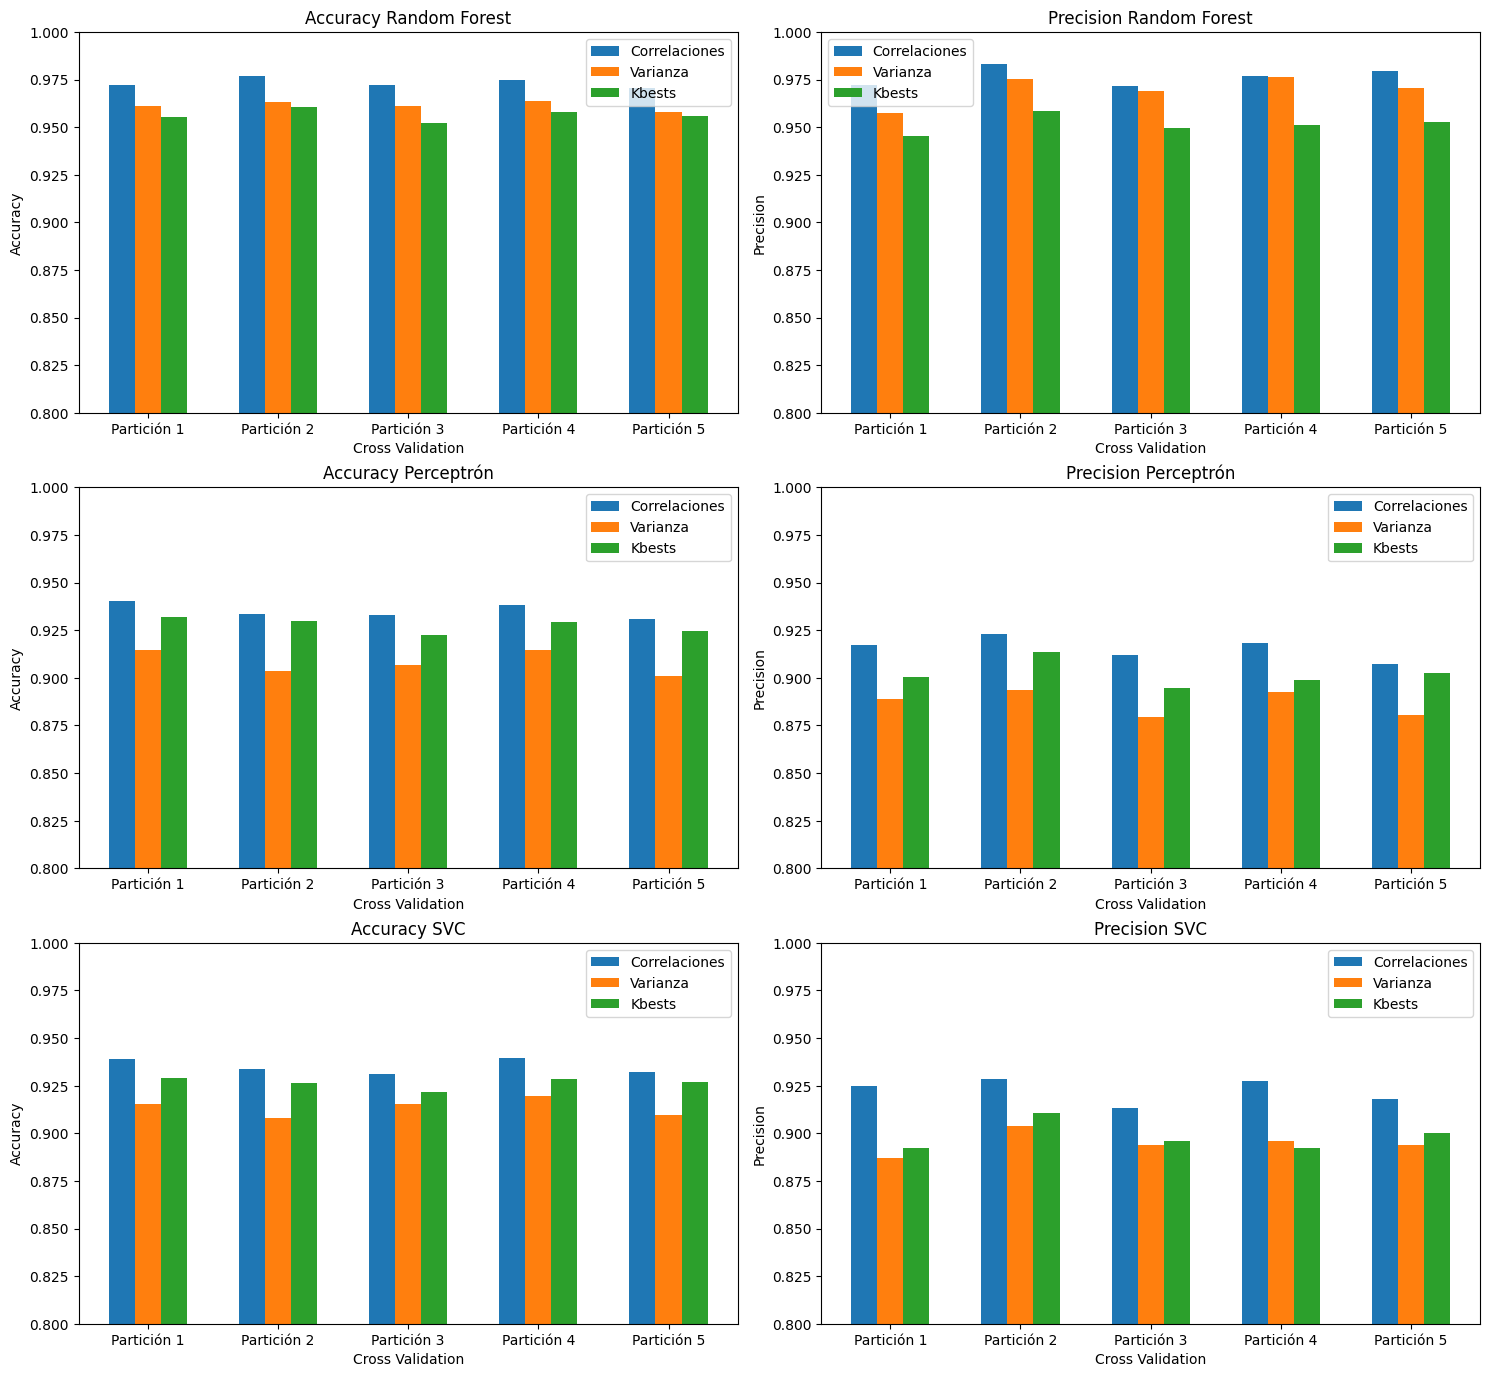

In [ ]:
data1 = [corr_accuracy_rfr, var_accuracy_rfr, kb_accuracy_rfr]
data2 = [corr_precision_rfr, var_precision_rfr, kb_precision_rfr]
data3 = [corr_accuracy_mlp, var_accuracy_mlp, kb_accuracy_mlp]
data4 = [corr_precision_mlp, var_precision_mlp, kb_precision_mlp]
data5 = [corr_accuracy_svc, var_accuracy_svc, kb_accuracy_svc]
data6 = [corr_precision_svc, var_precision_svc, kb_precision_svc]
data = [data1,data2,data3,data4,data5,data6]
labels = ['Partición 1', 'Partición 2', 'Partición 3', 'Partición 4', 'Partición 5']

num_series = len(data1)
bar_width = 0.2

x = np.arange(len(labels))

fig, ax = plt.subplots(3,2, figsize=(15, 15))

names = ['Random Forest', 'Perceptrón', 'SVC']
for i in range(len(data)//2):
  # Accuracy
  ax[i,0].bar(x + 0 * bar_width, data[2*i][0], width=bar_width, label='Correlaciones')
  ax[i,0].bar(x + 1 * bar_width, data[2*i][1], width=bar_width, label='Varianza')
  ax[i,0].bar(x + 2 * bar_width, data[2*i][2], width=bar_width, label='Kbests')

  ax[i,0].set_xlabel('Cross Validation')
  ax[i,0].set_ylabel('Accuracy')
  ax[i,0].set_title(f'Accuracy {names[i]}')
  ax[i,0].set_xticks(x + ((num_series - 1) * bar_width) / 2)
  ax[i,0].set_xticklabels(labels)
  ax[i,0].set_ylim(0.8, 1)
  ax[i,0].legend()

  # Precision
  ax[i,1].bar(x + 0 * bar_width, data[2*i+1][0], width=bar_width, label='Correlaciones')
  ax[i,1].bar(x + 1 * bar_width, data[2*i+1][1], width=bar_width, label='Varianza')
  ax[i,1].bar(x + 2 * bar_width, data[2*i+1][2], width=bar_width, label='Kbests')

  ax[i,1].set_xlabel('Cross Validation')
  ax[i,1].set_ylabel('Precision')
  ax[i,1].set_title(f'Precision {names[i]}')
  ax[i,1].set_xticks(x + ((num_series - 1) * bar_width) / 2)
  ax[i,1].set_xticklabels(labels)
  ax[i,1].set_ylim(0.8, 1)
  ax[i,1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('Malware.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Sin duda, las características que mejor funcionan son las escogidas mediante varianza. Tomando más características funciona pero se ralentizan los procesos.\
Algo que se repite en los tres clasificadores es que clasifican mejor las aplicaciones benignas (0) que las malignas (1). Si priorizamos la detección de aplicaciones malignas (que es lo suyo) el mejor clasificador es el perceptrón multicapa, aunque como se comentó en la sección, es matar moscas a cañonazos. Si nos fijamos en el rendimiento general, un random forest específico para cada método es lo mejor, pues es más eficiente a la hora de predecir y las scores no varían mucho entre los tres métodos.